In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
base_path = "/content/drive/MyDrive/Colab Notebooks/Images"

In [3]:
import cv2
import glob as gl
import random

In [4]:
images =[]
for i in range(4):
  images.append( gl.glob(base_path + "/" + str(i) + "/*.jpg"))
print(images)

[['/content/drive/MyDrive/Colab Notebooks/Images/0/0.jpg', '/content/drive/MyDrive/Colab Notebooks/Images/0/1.jpg', '/content/drive/MyDrive/Colab Notebooks/Images/0/2.jpg', '/content/drive/MyDrive/Colab Notebooks/Images/0/3.jpg', '/content/drive/MyDrive/Colab Notebooks/Images/0/4.jpg', '/content/drive/MyDrive/Colab Notebooks/Images/0/5.jpg', '/content/drive/MyDrive/Colab Notebooks/Images/0/6.jpg', '/content/drive/MyDrive/Colab Notebooks/Images/0/7.jpg', '/content/drive/MyDrive/Colab Notebooks/Images/0/8.jpg', '/content/drive/MyDrive/Colab Notebooks/Images/0/9.jpg'], ['/content/drive/MyDrive/Colab Notebooks/Images/1/0.jpg', '/content/drive/MyDrive/Colab Notebooks/Images/1/1.jpg', '/content/drive/MyDrive/Colab Notebooks/Images/1/2.jpg', '/content/drive/MyDrive/Colab Notebooks/Images/1/3.jpg', '/content/drive/MyDrive/Colab Notebooks/Images/1/4.jpg', '/content/drive/MyDrive/Colab Notebooks/Images/1/5.jpg', '/content/drive/MyDrive/Colab Notebooks/Images/1/6.jpg', '/content/drive/MyDrive/Col

In [5]:
random.seed(42) #ca sa obtinem toti aceleasi rezultate

randomlist = random.sample(range(0,9),7) # alegem 7 numere la intamplare intre 0 si 9
# cream 2 liste fiecare nested in care punem caile pentru pozele de antrenare si testare, pe clase
train_img = []
test_img = []
for j in range(4):
  tmp_train = []
  tmp_test = []
  for i in range(10):
    if i in randomlist:
      tmp_train.append(images[j][i])
    else:
      tmp_test.append(images[j][i])
  train_img.append(tmp_train)
  test_img.append(tmp_test)
  
print(train_img)
print(test_img)
print(randomlist)

[['/content/drive/MyDrive/Colab Notebooks/Images/0/0.jpg', '/content/drive/MyDrive/Colab Notebooks/Images/0/1.jpg', '/content/drive/MyDrive/Colab Notebooks/Images/0/2.jpg', '/content/drive/MyDrive/Colab Notebooks/Images/0/4.jpg', '/content/drive/MyDrive/Colab Notebooks/Images/0/5.jpg', '/content/drive/MyDrive/Colab Notebooks/Images/0/7.jpg', '/content/drive/MyDrive/Colab Notebooks/Images/0/8.jpg'], ['/content/drive/MyDrive/Colab Notebooks/Images/1/0.jpg', '/content/drive/MyDrive/Colab Notebooks/Images/1/1.jpg', '/content/drive/MyDrive/Colab Notebooks/Images/1/2.jpg', '/content/drive/MyDrive/Colab Notebooks/Images/1/4.jpg', '/content/drive/MyDrive/Colab Notebooks/Images/1/5.jpg', '/content/drive/MyDrive/Colab Notebooks/Images/1/7.jpg', '/content/drive/MyDrive/Colab Notebooks/Images/1/8.jpg'], ['/content/drive/MyDrive/Colab Notebooks/Images/2/0.jpg', '/content/drive/MyDrive/Colab Notebooks/Images/2/1.jpg', '/content/drive/MyDrive/Colab Notebooks/Images/2/2.jpg', '/content/drive/MyDrive/C

In [6]:
# cream liste in care citim imaginile
tr_im = []
ts_im = []
for i in range(len(train_img)):
  tmp = []
  for j in range(len(train_img[0])):
    im = cv2.imread(train_img[i][j])
    tmp.append(im)
  tr_im.append(tmp)

for i in range(len(test_img)):
  tmp = []
  for j in range(len(test_img[0])):
    im = cv2.imread(test_img[i][j])
    tmp.append(im)
  ts_im.append(tmp)


In [ ]:
#opencv
from google.colab.patches import cv2_imshow
cv2_imshow(tr_im[0][0])
# eventual putem folosi matplot lib dar sa nu uitam sa facem convertirea RGB BGR, 
#plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))plt.show()

In [7]:
# facem scale down la picture acestea fiind prea mari
w = tr_im[0][0].shape[1]
h = tr_im[0][0].shape[0]
scale_factor = 15
nw = int(w * scale_factor / 100)
nh = int(h * scale_factor / 100)
for i in range(len(tr_im)):
  for j in range(len(tr_im[0])):
    tr_im[i][j] = cv2.resize(cv2.cvtColor(tr_im[i][j],cv2.COLOR_BGR2RGB),(nw,nh))

for i in range(len(ts_im)):
  for j in range(len(ts_im[0])):
     ts_im[i][j] = cv2.resize(cv2.cvtColor(ts_im[i][j],cv2.COLOR_BGR2RGB),(nw,nh))

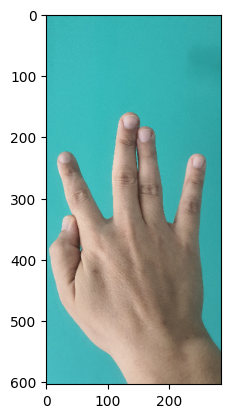

In [8]:
import matplotlib.pyplot as plt 

plt.imshow(tr_im[0][0])


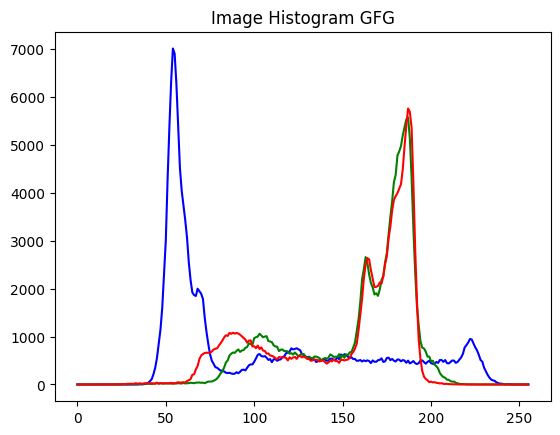

In [9]:
### plotam histograma pentru a ne putea ajuta in alegerea pragurilor necesare segmentarii imaginii
colors = ('b','g','r')
for i,color in enumerate(colors):
    hist = cv2.calcHist([tr_im[0][0]],[i],None,[256],[0,256])
    plt.plot(hist,color = color)
plt.title('Image Histogram GFG')
plt.show()

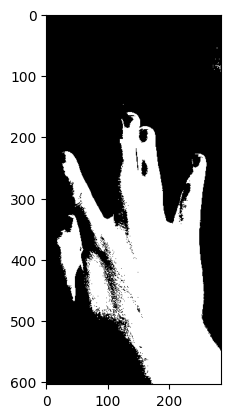

In [10]:
tst_tmp = tr_im[0][0][:,:,2].copy()
tst_tmp [tst_tmp>150] = 0
tst_tmp [tst_tmp>0] = 255
plt.imshow(tst_tmp,cmap='gray')

In [ ]:
### incercam sa separam mana de fundal, alegem range-uri de valori pentru canalele de culoare ce ar trebui sa obtina culoarea pielii
tst_tmp = tr_im[0][0].copy()
width = int(tst_tmp.shape[1])
height = int(tst_tmp.shape[0])
for i in range(height):
  for j in range(width):
    if  tst_tmp[i][j][0] in range(16,77) and tst_tmp[i][j][1] in range(123,204) and tst_tmp[i][j][2] in range(111,205):
      tst_tmp[i][j] = [0,0,0]
    else:
      tst_tmp[i][j] = [255,255,255]

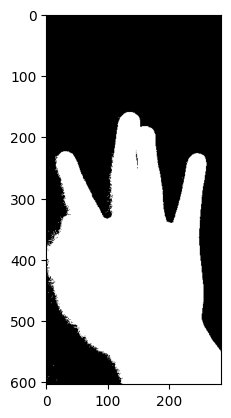

In [11]:
import numpy as np

tst_tmp_3 = tr_im[0][0].copy()
def binaize_pic_2(img):
  mask = np.logical_and.reduce((
      img[:,:,0] >= 16,
      img[:,:,0] <= 77,
      img[:,:,1] >= 123,
      img[:,:,1] <= 204,
      img[:,:,2] >= 111,
      img[:,:,2] <= 205,
  ))

  img[mask] = [0,0,0]
  img[~mask] = [255,255,255]
  return img

plt.imshow(binaize_pic_2(tst_tmp_3),cmap='gray')
plt.show()

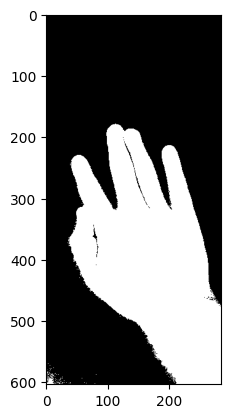

In [12]:
# functie de separare a mainii de fundal/creare masca
def binarize_pic(img):
  # to debug 
  R = img[:,:,0]
  G = img[:,:,1] 
  B = img[:,:,2]
  C1 = (R>16)&(R<77)
  C2 = (G>123)&(G<204)
  C3 = (B>111)&(B<205)
  C4 = C1 + C2 + C3
  C4[C4>1] = 1
  C1 = 1 - C1
  return C1
tst_tmp2 = tr_im[0][1].copy()
test_bin_pic = binarize_pic(tst_tmp2)
plt.imshow(test_bin_pic,cmap='gray')
plt.show()
#plt.imshow(tst_tmp2)
#plt.show()

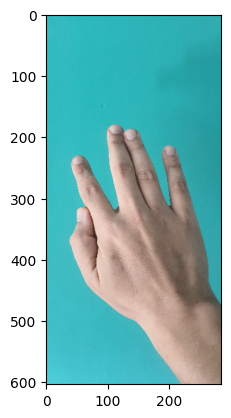

In [13]:
plt.imshow(tst_tmp2,cmap = 'gray')

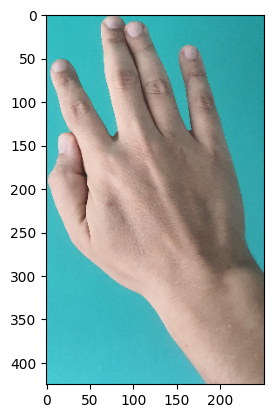

In [15]:
import numpy as np
## tr_im lista imag train (7)
## ts_img lista imag test (3)
contours, _ = cv2.findContours(test_bin_pic.astype(np.uint8),cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE) # cautam contururile din poza, contours este o lista de contururi
arie_max = 0
rectangle = np.array([0,0,0,0])
for i in contours: # cel mai mare contur va fi cel al mainii deci alegem aria maxima si conturul aferent acesteia
  tmp = cv2.boundingRect(i) # construieste deptunghiu aferent conturului
  area = tmp[2] * tmp[3]
  if area > arie_max:
    rectangle = tmp
    arie_max = area

cropped_img = tst_tmp2[rectangle[1]:rectangle[3]+rectangle[1],rectangle[0]:rectangle[0]+rectangle[2]]
plt.imshow(cropped_img,cmap = 'gray')

In [16]:
# cream noi liste pentru mastile imaginilor
tr_binary_pic = []
for i in tr_im:
  tmp_list = []
  for j in i:
    tmp_list.append(binarize_pic(j))
  tr_binary_pic.append(tmp_list)

ts_binary_pic = []
for i in ts_im:
  tmp_list = []
  for j in i:
    tmp_list.append(binarize_pic(j))
  ts_binary_pic.append(tmp_list)


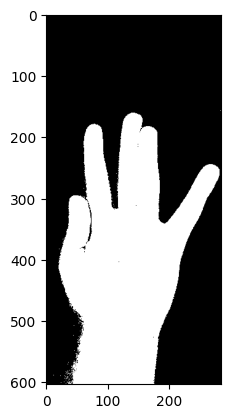

(604, 286)


In [24]:
### Exemplu imagine binarizata
plt.imshow(ts_binary_pic[0][1], cmap='gray')
plt.show()
print(np.shape(ts_binary_pic[0][1]))

In [ ]:
'''
import pickle
import os
path_to_save = "/content/drive/MyDrive/Colab Notebooks"

with open(os.path.join(path_to_save,'train_images_binary.pkl'), 'wb') as f:
  pickle.dump(tr_binary_pic, f)

with open(os.path.join(path_to_save,'test_images_binary.pkl'), 'wb') as f:
  pickle.dump(ts_binary_pic, f)


with open(os.path.join(path_to_save,'train_images_binary.pkl'), 'rb') as f:
  tr_binary_pic2 = pickle.load(f)

with open(os.path.join(path_to_save,'test_images_binary.pkl'), 'rb') as f:
  ts_binary_pic2 = pickle.load(f)
'''


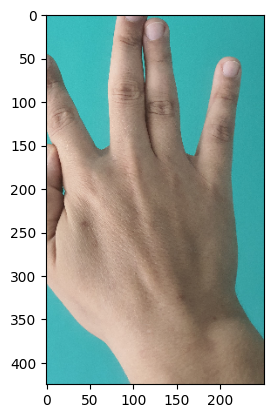

In [18]:
### Exemplu imagine decupata
tmp2 = tr_im[0][0].copy()
cropped_img_color = tmp2[rectangle[1]:rectangle[3]+rectangle[1],rectangle[0]:rectangle[0]+rectangle[2]]
plt.imshow(cropped_img_color)

In [19]:
def find_contours(tst_tmp):
  contours, _ = cv2.findContours((tst_tmp*255).astype(np.uint8),cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
  arie_max = 0
  rectangle = np.array([0,0,0,0])
  for i in contours:
    tmp = cv2.boundingRect(i)
    area = tmp[2] * tmp[3]
    if area > arie_max:
      rectangle = tmp
      arie_max = area
  return rectangle

# decupam atat pozele originale cat si mastile
tr_img_cropped = []
train_masks_cropped = []
for idxi, i in enumerate(tr_im):
  tmp_list = []
  tmp_mask = []
  for idxj,j in enumerate(i):
    rectangle = find_contours(tr_binary_pic[idxi][idxj])
    cropped_img = j[rectangle[1]:rectangle[3]+rectangle[1],rectangle[0]:rectangle[0]+rectangle[2]]
    cropped_mask = tr_binary_pic[idxi][idxj][rectangle[1]:rectangle[3]+rectangle[1],rectangle[0]:rectangle[0]+rectangle[2]]
    tmp_list.append(cropped_img)
    tmp_mask.append(cropped_mask)
  tr_img_cropped.append(tmp_list)
  train_masks_cropped.append(tmp_mask)



ts_img_cropped = []
test_masks_cropped = []
for idxi, i in enumerate(ts_im):
  tmp_list = []
  tmp_mask = []
  for idxj,j in enumerate(i):
    rectangle = find_contours(ts_binary_pic[idxi][idxj])
    cropped_img = j[rectangle[1]:rectangle[3]+rectangle[1],rectangle[0]:rectangle[0]+rectangle[2]]
    cropped_mask = ts_binary_pic[idxi][idxj][rectangle[1]:rectangle[3]+rectangle[1],rectangle[0]:rectangle[0]+rectangle[2]]
    tmp_list.append(cropped_img)
    tmp_mask.append(cropped_mask)
  ts_img_cropped.append(tmp_list)
  test_masks_cropped.append(tmp_mask)

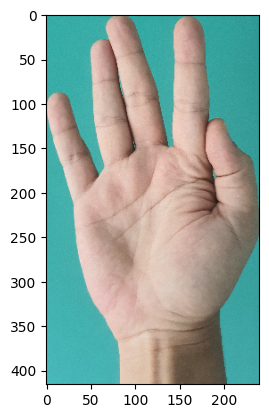

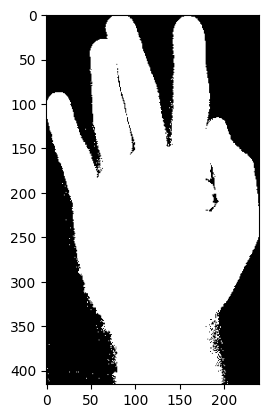

In [20]:
plt.imshow(ts_img_cropped[0][0])
plt.show()
plt.imshow(test_masks_cropped[0][0],cmap='gray')
plt.show()

In [21]:
# facem resize pentru a avea aceasi dim a pozelor, de asemenea inlocuim toti pixelii ce nu reprezinta mana cu negru
nw = 64
nh = 128
for i in range(len(tr_img_cropped)):
  for j in range(len(tr_img_cropped[0])):
    tr_img_cropped[i][j][train_masks_cropped[i][j] == 0] = 0
    tr_img_cropped[i][j] = cv2.resize(tr_img_cropped[i][j],(nw,nh))

for i in range(len(ts_img_cropped)):
  for j in range(len(ts_img_cropped[0])):
     ts_img_cropped[i][j][test_masks_cropped[i][j] == 0] = 0
     ts_img_cropped[i][j] = cv2.resize(ts_img_cropped[i][j],(nw,nh))


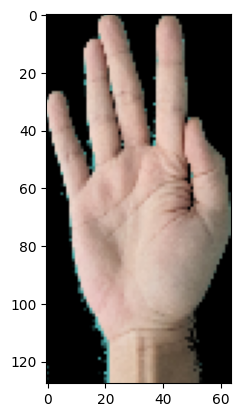

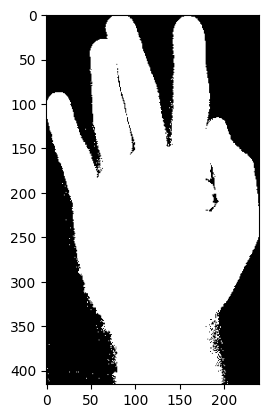

In [22]:
plt.imshow(ts_img_cropped[0][0])
plt.show()
plt.imshow(test_masks_cropped[0][0],cmap='gray')
plt.show()

In [26]:
winSize = (32,32)
blockSize = (32,32)
blockStride = (16,16)
cellSize = (16,16)
nbins = 9
derivAperture = 1
winSigma = 4.
histogramNormType = 0
L2HysThreshold = 2.0000000000000001e-01
gammaCorrection = 0
rndp = 32
nlevels = 64
hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,
                        histogramNormType,L2HysThreshold,gammaCorrection,nlevels)
descriptor = hog.compute(cropped_img_color)
print(descriptor.shape)

hog_train_images = []
hog_test_images = []

for i in tr_img_cropped:
  tmp = []
  for j in i:
    tmp.append(hog.compute(j))
  hog_train_images.append(tmp)

for i in ts_img_cropped:
  tmp = []
  for j in i:
    tmp.append(hog.compute(j))
  hog_test_images.append(tmp)



(12600,)


In [34]:
train_vector = []
train_label_vector = []
l = 0
for i in hog_train_images:
  for j in i: 
    train_vector.append(j)
    train_label_vector.append(l)
  l+=1

test_vector = []
test_label_vector = []
l = 0
for i in hog_test_images:
  for j in i: 
    test_vector.append(j)
    test_label_vector.append(l)
  l+=1



In [30]:
knn = cv2.ml.KNearest_create()
train_vector = np.float32(train_vector)
train_label_vector = np.float32(train_label_vector)
knn.train(train_vector, cv2.ml.ROW_SAMPLE, train_label_vector)


True

In [37]:
print(np.shape(test_vector[0]))
print(np.shape(train_vector[0]))

(756,)
(756,)


In [56]:
# eroare deoarece np.shape(train_vector[0]) = (756,)
knn.findNearest(np.float32(test_vector[0]).reshape(1,756), 3)

0.0

In [61]:
print(np.float32(test_vector).shape)

(12, 756)


In [68]:
accuracy = 0
predict_vector = []
for i,k in enumerate(test_vector):
  prediction = knn.findNearest(np.float32(k).reshape(1,756), 3)[0]
  predict_vector.append(prediction)
  if prediction == test_label_vector[i]:
      accuracy += 1
print(predict_vector)  
print(test_label_vector)
print('accuracy: ', accuracy/len(test_vector)*100)

[0.0, 0.0, 3.0, 0.0, 3.0, 0.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0]
[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3]
accuracy:  66.66666666666666


In [54]:
### SVM
svm = cv2.ml.SVM_create()
svm.setType(cv2.ml.SVM_C_SVC)
svm.setKernel(cv2.ml.SVM_LINEAR)
svm.setTermCriteria((cv2.TERM_CRITERIA_MAX_ITER, 100, 1e-6))
train_label_vector = np.int32(train_label_vector)
svm.train(np.array(train_vector), cv2.ml.ROW_SAMPLE, np.array(train_label_vector))

True

In [65]:
svm.predict(np.float32(test_vector[0]).reshape(1,756))[0]

0.0

In [67]:
accuracy = 0
predict_vector = []
for i,k in enumerate(test_vector):
  prediction = svm.predict(np.float32(k).reshape(1,756))[0]
  predict_vector.append(prediction)
  if prediction == test_label_vector[i]:
    accuracy += 1
print(predict_vector)
print(test_label_vector)
print('accuracy: ', accuracy/len(test_vector)*100)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3]
accuracy:  25.0
